<a href="https://colab.research.google.com/github/Brijeshtanwar/Topic-Modeling/blob/main/text_summ_llama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
url = """https://raw.githubusercontent.com/Brijeshtanwar/Topic-Modeling/main/voc_data.csv"""
df = pd.read_csv(url,  encoding = 'unicode_escape')

In [15]:
df=df.sample(1000)

In [16]:
df = df[['CUSTOMER COMMENT', 'Reason']]
df.columns = ['comment', 'topic']

In [17]:
df.isnull().sum()

comment    0
topic      0
dtype: int64

In [18]:
# Drop na
df.dropna(axis=0, inplace=True)

In [19]:
df.topic.value_counts()

Service                      307
APPLICATION (WEB/APP)        221
Others                        71
SERVICE                       65
NOT SPECIFIED                 59
CHARGES(BRO./DP/LPC ETC.)     55
application                   39
others                        38
service                       34
Not Specified                 34
Process                       28
People                        23
charges                       10
people                         6
PEOPLE                         4
PROCESS                        2
Product                        2
product                        1
process                        1
Name: topic, dtype: int64

In [20]:
#lower case
df['topic'] = df['topic'].str.lower()
df['topic'] = df['topic'].str.strip()
df.loc[df.topic=='not specified', 'topic'] = 'others'

In [21]:
df.topic.unique()

array(['charges(bro./dp/lpc etc.)', 'others', 'application (web/app)',
       'service', 'application', 'process', 'charges', 'people',
       'product'], dtype=object)

In [22]:
topic_dic = {'application (web/app)': 'application',  'charges(bro./dp/lpc etc.)': 'charges', 'service':'service'
, 'others':'others', 'process':'process', 'people':'people', 'product':'product'}

In [23]:
df['topic'] = df['topic'].map(topic_dic)

<Axes: xlabel='count', ylabel='topic'>

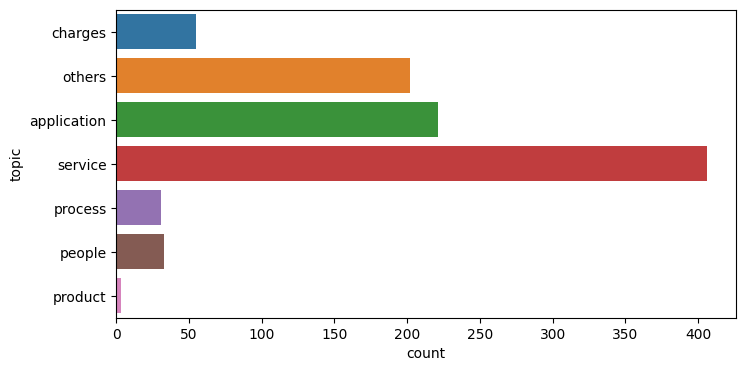

In [24]:
plt.figure(figsize=[8,4])
sns.countplot(y=df['topic'])

In [25]:
# Preprocessing

In [26]:
# Remove integer comments
df = df[df['comment'].apply(lambda x: not isinstance(x, int))]
df.reset_index(drop=True, inplace=True)

#lower case
df['comment'] = df['comment'].str.lower()

In [27]:
import re

In [28]:
def preprocess_text(text):
    ## clean (convert to lowercase and remove punctuations and  characters and then strip)
    text = re.sub(r"[^A-Za-z]+", ' ' , str(text).lower().strip())
    return text

In [29]:
df["x"] = df["comment"].apply(lambda x: preprocess_text(x))
# df['x'] = df['comment']
df['y'] = df['topic']
df.head(10)

,comment,topic,x,y
0,i have been wrongly charged margin money charg...,charges,i have been wrongly charged margin money charg...,charges
1,not good,others,not good,others
2,repeated calls for credit card is frustrating,others,repeated calls for credit card is frustrating,others
3,problem not solve during trading hours,application,problem not solve during trading hours,application
4,nknfjfjfjfjhfjfj,others,nknfjfjfjfjhfjfj,others
5,i do not remember the lady representative name...,service,i do not remember the lady representative name...,service
6,hope less service do your part of the work is ...,service,hope less service do your part of the work is ...,service
7,"hidden charges, no solution for any quarry, no...",service,hidden charges no solution for any quarry no p...,service
8,"zero rating on customer resolving, one person ...",service,zero rating on customer resolving one person t...,service
9,thanks,others,thanks,others


In [30]:
df = df[['x', 'y']]

In [31]:
text = ". ".join(df[df['y']=='application']['x'])

In [32]:
# Sentiment analysis

In [40]:
import torch

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.2 MB/s eta 0:00:00


In [3]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
# Preprocess text (username and link placeholders)

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


1) negative 0.7236
2) neutral 0.2287
3) positive 0.0477


In [35]:
text = "Covid cases are increasing fast!"

In [42]:
def sentiment_score(text):
  tokens = tokenizer.encode(text, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits))


In [45]:
df['sentiment'] = df['x'].apply(lambda x: sentiment_score(x[:512]))
mappings = {0:'Negative', 1:'Neutral', 2:'Positive'}
df['sentiment'] = df['sentiment'].replace(mappings)

,x,y,sentiment
0,i have been wrongly charged margin money charg...,charges,Negative
1,not good,others,Negative


In [19]:
# Llama 2

In [20]:
!pip install -q transformers einops accelerate langchain bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00


In [21]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' cre

In [22]:
# ! pip install torch==1.13.1

In [23]:
from langchain import HuggingFacePipeline
from transformers import AutoTokenizer
import transformers
import torch

model = "meta-llama/Llama-2-7b-chat-hf"

tokenizer = AutoTokenizer.from_pretrained(model)

pipeline = transformers.pipeline(
    "text-generation", #task
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
    device_map="auto",
    max_length=1000,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [24]:
llm = HuggingFacePipeline(pipeline = pipeline, model_kwargs = {'temperature':0})

In [25]:
# from transformers import AutoModelForCausalLM, AutoTokenizer
# import torch

# tokenizer  = AutoTokenizer.from_pretrained("EleutherAI/pythia-1.4b-deduped")
# model= AutoModelForCausalLM.from_pretrained(
#     "EleutherAI/pythia-1.4b-deduped",
#     torch_dtype=torch.bfloat16,
#     rope_scaling={"type":"dynamic", "factor": 2.0},
# ).to("cuda")



In [26]:
# prompt = f""" Write a concise summary of the following text delimited by triple backquotes.
#               Return your response in bullet points which covers the key points of the text.
#               ```{text}```
#               BULLET POINT SUMMARY:
#               """

# inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
# gen_out = model.generate(**inputs, max_new_tokens=10)
# print(tokenizer.batch_decode(gen_out)[0])

In [46]:
text = ". ".join(df[df['y']=='product']['x'])

In [47]:
text = text[:1000]

In [42]:
from langchain import PromptTemplate,  LLMChain

template = """
              Write a concise summary of the following text delimited by triple backquotes.
              Return your response in bullet points which covers the key points of the text.
              ```{text}```
              BULLET POINT SUMMARY:
           """

prompt = PromptTemplate(template=template, input_variables=["text"])

llm_chain = LLMChain(prompt=prompt, llm=llm)

In [43]:
print(llm_chain.run(text))

 • Need more investment opportunities and recommendations
            • Dissatisfied with lack of specific stock suggestions and guidance compared to Angel Broking
            • Mutual fund holding available in DP statement since last four years but not redeemed online due to resolution.
            • Need to visit branch for redemption as there is no online option.
            • MF investment platform needs an overhaul.
            • Requesting daily recommendations but not receiving any.
            • Regular customer but not receiving concrete recommendations from the team.
            • Need intraday recommendations only.
            • Require good recommendations that provide more intraday recommendations and proper guidance to avoid losses.





In [48]:
text

'to optima client provided daily recommendation. pls pls try to give more recomendations in f o segment specially for nifty and nifty bank one of my friend is having account with angel one and last month he earned cool lakhs on investment of rs lakhs it must be known to you that in last few months angel one has grown mainly because of f o business and you are lacking you have such a good team hats off to mr sahaj aggarwal and mr shrikant chauhan but on ground recos are missing please look in to it and i am confident people will flock ks. your trading platform is excellent you provide a margin status daily i wonder what information it conveys i tied checking with a kotaksec person in gurgaon and was told it is meaningless please ignore i always trade in cash why is there no facility to take cash upfront and then allow trading it avoids confusion '